In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/Users/akileshsenthilkumar/Documents/practice/Machine Learning/K-NN/salary.csv")

In [6]:
### *Summarize Dataset*

print(df.shape)
print(df.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [7]:
## *Mapping Salary Data to Binary Value*

income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K' : 0,'>50K' :1}).astype(int)

In [8]:
print(df.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


In [9]:
## *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

x = df.iloc[:,:-1].values
print(x)
y = df.iloc[:,-1].values
print(y)


[[90  9  0 40]
 [82  9  0 18]
 [66 10  0 40]
 ...
 [40  9  0 40]
 [58  9  0 40]
 [22  9  0 20]]
[0 0 0 ... 1 0 0]


In [10]:
## *Splitting Dataset into Train & Test*

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 0)

In [11]:
## *Feature Scaling*

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
## *Finding the Best K-Value*

error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [13]:
# Calculating error for K values between 1 and 40

for i in range (1,30):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

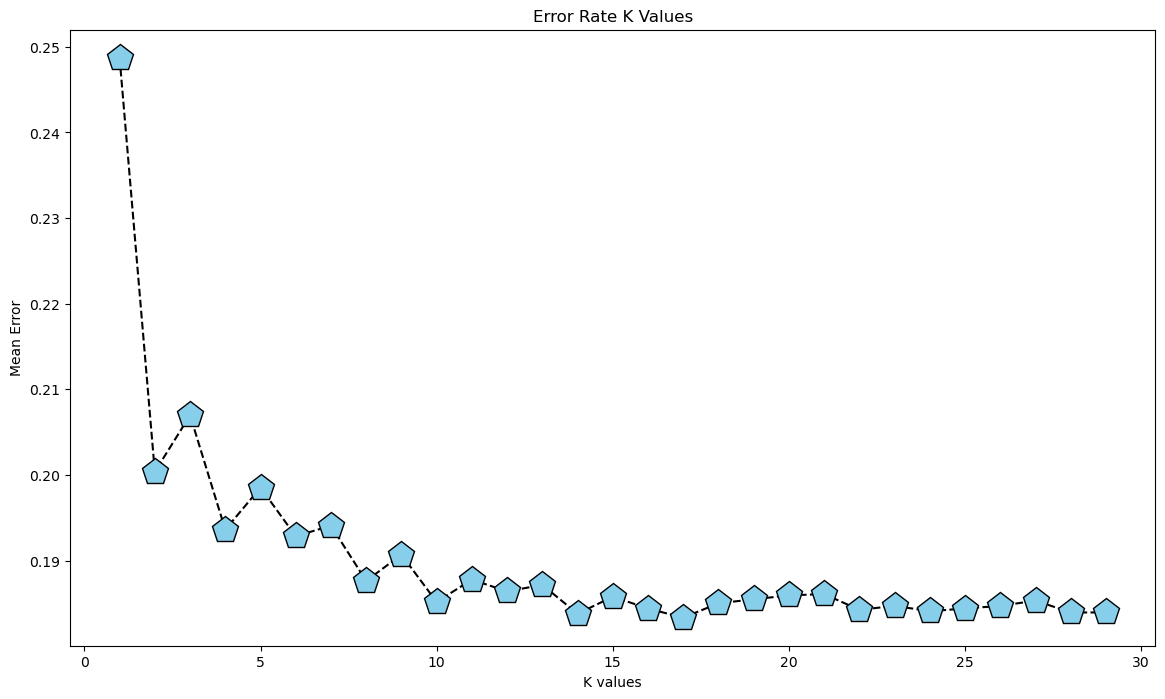

In [23]:
plt.figure(figsize = (14, 8))
plt.plot(range(1, 30), error,color='black',linestyle='dashed',marker='p',
         markerfacecolor='skyblue',markersize='20')
plt.title("Error Rate K Values")
plt.xlabel("K values")
plt.ylabel("Mean Error")

In [15]:
### *Training*"""

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
### *Predicting, wheather new customer with Age & Salary will Buy or Not*"""

age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age:  12
Enter New Employee's Education:  232323
Enter New Employee's Captital Gain:  1212
Enter New Employee's Hour's Per week:  1313


[0]
Customer might not got  Salary above 50K


In [19]:
### *Prediction for all Test Data*"""

y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [21]:
## *Evaluating Model - CONFUSION MATRIX*"""

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[4721  245]
 [1060  487]]


In [22]:
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 79.96315062183325%
